In [1]:
%matplotlib inline
import warnings
from math import sqrt
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import itertools
from math import factorial
import scipy 
import scipy.linalg
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

### 1. Решите линейную систему:
$\begin{pmatrix}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9\\
\end{pmatrix}*X=\begin{pmatrix}
12\\
2\\
1\\
\end{pmatrix}$


In [2]:
A = np.array([[1, 2, 3], [4, 0, -6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-48.        ,  78.5       , -32.33333333])

Проверим

In [3]:
np.array([[1, 2, 3], [4, 0, -6], [7, 8, 9]]).dot(np.array([-48,  78.5, -32.33333333]))

array([12.00000001,  1.99999998,  1.00000003])

Видим, что наше решение правильное

### 2. Найдите псевдорешение:
$x + 2y – z = 1\\
3x – 4y = 7\\
8x – 5y + 2z = 12\\
2x – 5z = 7\\
11x +4y – 7z = 15$  
#### Решение:


In [4]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, -5, 0], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

(array([ 1.15601029, -0.889718  , -0.85029782]),
 array([0.66772534]),
 3,
 array([14.89650167, 10.4695886 ,  2.73531577]))

Проверим

In [5]:
np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, -5, 0], [11, 4, -7]]).dot(np.array([ 1.15601029, -0.889718  , -0.85029782]))

array([ 0.22687211,  7.02690287, 11.99607668,  6.76061058, 15.10932593])

Видим, что псевдорешения найдены верно

### 3. Сколько решений имеет линейная система:
$\begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{pmatrix}*X=\begin{pmatrix}
12\\
2\\
1\\
\end{pmatrix}$  

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.
#### Решение:  
Сравним ранги исходной и расширенной матриц

In [6]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
С = np.array([[1, 2, 3, 12], [4, 5, 6, 2], [7, 8, 9, 1]])
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(С, 0.0001)

(2, 3)

Видим, что ранг расширенной матрицы больше ранга исходной матрицы, следовательно система не имеет решений

Заменим в правойчасти 12 и 2 на 1 и система станет совместной

In [7]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([1, 1, 1])
С = np.array([[1, 2, 3, 1], [4, 5, 6, 1], [7, 8, 9, 1]])
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(С, 0.0001)

(2, 2)

Решим ее

In [8]:
np.linalg.solve(A, B)

array([-2.5,  4. , -1.5])

Проверим

In [9]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]).dot(np.array([-2.5,  4. , -1.5]))

array([1., 1., 1.])

Все верно, решение правильное

### 4. Вычислите LU-разложение матрицы:
$\begin{pmatrix}
1 & 2 & 3\\
2 & 16 & 21\\
4 & 28 & 73\\
\end{pmatrix}$  
### После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [10]:
A = np.array([[ 1,  2,  3], [ 2, 16, 21], [ 4, 28, 73]])
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

print(np.dot(P.transpose(), A) - np.dot(L, U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Видим, что разложение прошло правильно. Придумаем вектор правых частей и решим систему.

In [11]:
A = np.dot(L, U)
B = np.array([4, 1, 7])
np.linalg.solve(A, B)

array([ 0.28240741,  0.70601852, -0.23148148])

Проверим

In [12]:
A.dot(np.linalg.solve(A, B))

array([4., 1., 7.])

In [13]:
np.array([[ 1,  2,  3], [ 2, 16, 21], [ 4, 28, 73]]).dot(np.linalg.solve(A, B))

array([1., 7., 4.])

Видим, что решение правильное

### 5. Найдите нормальное псевдорешение недоопределенной системы:
### $x + 2y – z = 1\\
8x – 5y + 2z = 12$
### Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.
#### Решение:
Определим функцию Q(x,y,z), равную норме решения, и найдем ее минимум.

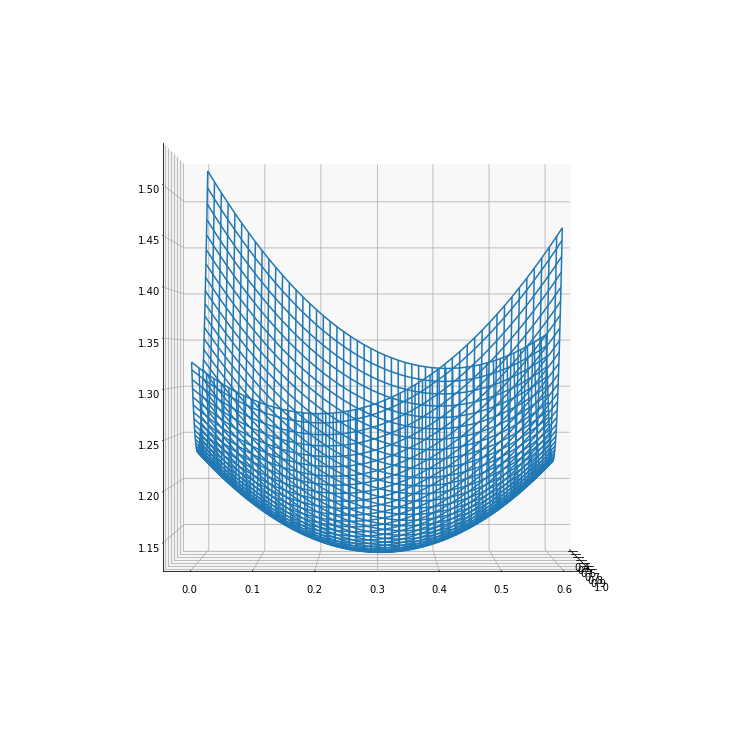

In [14]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

X = np.linspace(0.4, 1, 200)
Z = np.linspace(0, 0.6, 200)
fig = figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.view_init(0, 0)
X, Z = np.meshgrid(X, Z)
Y = (3*Z)/7+X - (11/7)
ax.plot_wireframe(X, Z, Q(X, Z, Y))
# ax.scatter(-0.18081181, 0.0202952, 1.3, 'z', 50,'red')
show()

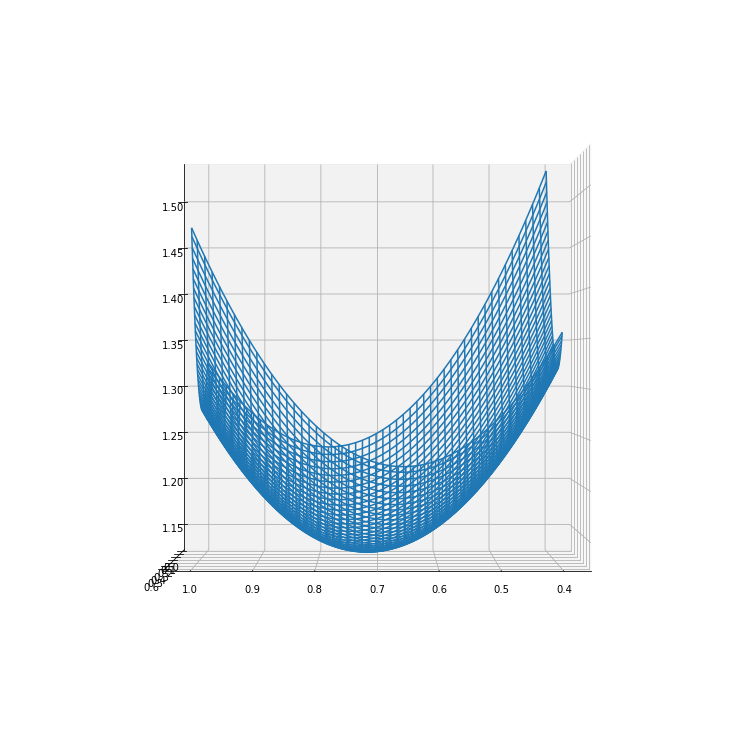

In [15]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)
X = np.linspace(0.4, 1, 200)
Z = np.linspace(0, 0.6, 200)
fig = figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.view_init(0, 90)
X, Z = np.meshgrid(X, Z)
Y = (3*Z)/7+X - (11/7)
ax.plot_wireframe(X, Z, Q(X, Z, Y))
# ax.scatter(-0.18081181, 0.0202952, 1.3, 'z', 50,'red')
show()

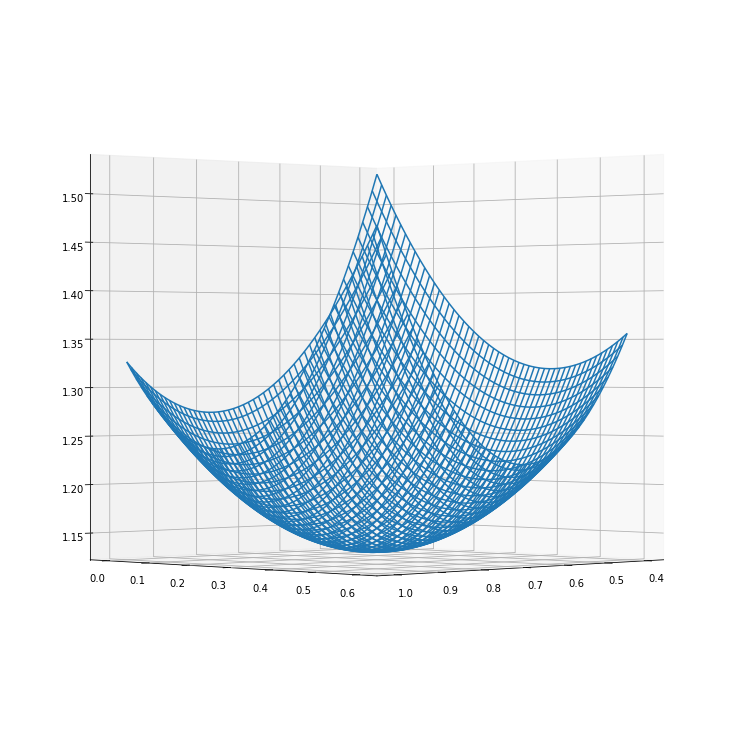

In [16]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)
X = np.linspace(0.4, 1, 200)
Z = np.linspace(0, 0.6, 200)
fig = figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.view_init(0, 45)
X, Z = np.meshgrid(X, Z)
Y = (3*Z)/7+X - (11/7)
ax.plot_wireframe(X, Z, Q(X, Z, Y))
# ax.scatter(-0.18081181, 0.0202952, 1.3, 'z', 50,'red')
show()

Теперь найдем нормальное псевдорешение с помощью инструментов Pyhton

In [17]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

Проверим решение

In [18]:
A.dot([ 1.38191882, -0.18081181,  0.0202952 ])

array([ 1.        , 12.00000001])

Видим, что решение правильное

### 6. Найдите одно из псевдорешений вырожденной системы:
$\begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{pmatrix}*X=\begin{pmatrix}
2\\
5\\
11\\
\end{pmatrix}$  

### Попробуйте также отыскать и нормальное псевдорешение.


In [19]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]


In [20]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [21]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.43769499e-15])

In [22]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.32822279e-15])

In [23]:
X = np.append(X1, 0)
print (X)

[1.50000000e+00 9.32822279e-15 0.00000000e+00]


Проверим решение

In [24]:
A.dot([ 1.50000000e+00, 9.32822279e-15, 0.00000000e+00 ])

array([ 1.5,  6. , 10.5])

Мы видим, что решение приближено к правильному